In [1]:
import numpy as np
import pandas as pd
import seaborn as sn

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
sn.set(rc={'figure.figsize':(11.7,8.27)})

Data taken from UC Irvine Machine Learning Repository

Predicting the age of abalone from physical measurements.  The age of
   abalone is determined by cutting the shell through the cone, staining it,
   and counting the number of rings through a microscope -- a boring and
   time-consuming task.  Other measurements, which are easier to obtain, are
   used to predict the age.  Further information, such as weather patterns
   and location (hence food availability) may be required to solve the problem.

   From the original data examples with missing values were removed (the
   majority having the predicted value missing), and the ranges of the
   continuous values have been scaled for use with an ANN (by dividing by 200).

   Data comes from an original (non-machine-learning) study:

	Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and
	Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_
	species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North
	Coast and Islands of Bass Strait", Sea Fisheries Division, Technical
	Report No. 48 (ISSN 1034-3288)

In [3]:
data

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.columns = ['Sex','Length (mm)','Diameter (mm)','Height (mm)','Whole Weight (g)','Shucked Weight (g)','Viscera Weight (g)','Shell Weight (g)','Rings']
print("The columns are named as per the original data set as to make it easier to interpret and work with")
data.head()

The columns are named as per the original data set as to make it easier to interpret and work with


,Sex,Length (mm),Diameter (mm),Height (mm),Whole Weight (g),Shucked Weight (g),Viscera Weight (g),Shell Weight (g),Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [5]:
data.describe()

,Length (mm),Diameter (mm),Height (mm),Whole Weight (g),Shucked Weight (g),Viscera Weight (g),Shell Weight (g),Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [6]:
print("We check the differences in dimensions between infants and adults of either sex")
pd.set_option('display.max_rows', None)
data.groupby(['Sex']).describe().T

We check the differences in dimensions between infants and adults of either sex


Sex                                 F            I            M
Length (mm)        count  1307.000000  1342.000000  1527.000000
                   mean      0.579093     0.427746     0.561460
                   std       0.086160     0.108858     0.102695
                   min       0.275000     0.075000     0.155000
                   25%       0.525000     0.360000     0.505000
                   50%       0.590000     0.435000     0.580000
                   75%       0.640000     0.510000     0.630000
                   max       0.815000     0.725000     0.780000
Diameter (mm)      count  1307.000000  1342.000000  1527.000000
                   mean      0.454732     0.326494     0.439335
                   std       0.070954     0.088109     0.084404
                   min       0.195000     0.055000     0.110000
                   25%       0.410000     0.270000     0.395000
                   50%       0.465000     0.335000     0.455000
                   75%       0.505000     0.390000     0.500000
                   max       0.650000     0.550000     0.630000
Height (mm)        count  1307.000000  1342.000000  1527.000000
                   mean      0.158011     0.107996     0.151418
                   std       0.039984     0.031995     0.034786
                   min       0.015000     0.000000     0.025000
                   25%       0.140000     0.085000     0.130000
                   50%       0.160000     0.110000     0.155000
                   75%       0.175000     0.130000     0.175000
                   max       1.130000     0.220000     0.515000
Whole Weight (g)   count  1307.000000  1342.000000  1527.000000
                   mean      1.046532     0.431363     0.991772
                   std       0.430316     0.286275     0.470577
                   min       0.080000     0.002000     0.015500
                   25%       0.730000     0.205500     0.673250
                   50%       1.038500     0.384000     0.976000
                   75%       1.320250     0.599375     1.265750
                   max       2.657000     2.049500     2.825500
Shucked Weight (g) count  1307.000000  1342.000000  1527.000000
                   mean      0.446188     0.191035     0.433083
                   std       0.198663     0.128405     0.223009
                   min       0.031000     0.001000     0.006500
                   25%       0.295000     0.090000     0.276750
                   50%       0.440500     0.169750     0.422000
                   75%       0.573250     0.270375     0.566000
                   max       1.488000     0.773500     1.351000
Viscera Weight (g) count  1307.000000  1342.000000  1527.000000
                   mean      0.230689     0.092010     0.215620
                   std       0.097617     0.062536     0.104912
                   min       0.021000     0.000500     0.003000
                   25%       0.159000     0.042500     0.146000
                   50%       0.224000     0.080500     0.210000
                   75%       0.297250     0.130000     0.278000
                   max       0.590000     0.440500     0.760000
Shell Weight (g)   count  1307.000000  1342.000000  1527.000000
                   mean      0.302010     0.128182     0.282056
                   std       0.125649     0.084927     0.130833
                   min       0.025000     0.001500     0.005000
                   25%       0.213250     0.064125     0.190000
                   50%       0.295000     0.113000     0.276000
                   75%       0.375000     0.178500     0.355500
                   max       1.005000     0.655000     0.897000
Rings              count  1307.000000  1342.000000  1527.000000
                   mean     11.129304     7.890462    10.702685
                   std       3.104256     2.511554     3.025343
                   min       5.000000     1.000000     3.000000
                   25%       9.000000     6.000000     9.000000
                   50%      10.0

Scatterplot showing varaiation of length of male and female adules and infants


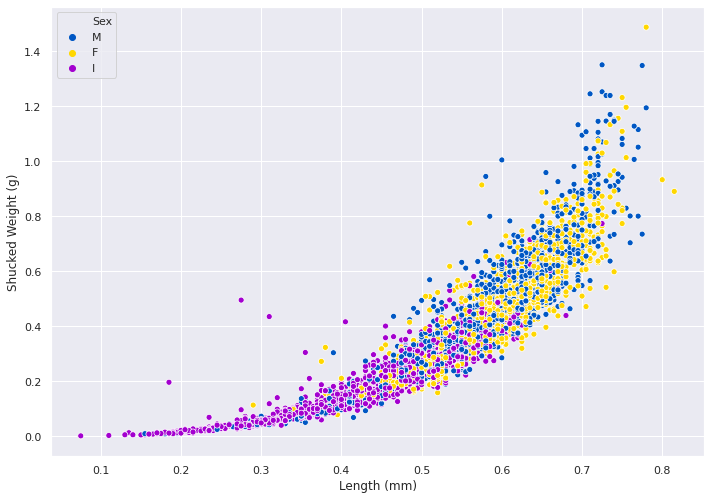

In [7]:
print("Scatterplot showing varaiation of length of male and female adules and infants")
sn.scatterplot(data = data, x ='Length (mm)', y='Shucked Weight (g)', hue="Sex",palette= 'prism')

Violin plot showing the variation in distribution of diametre length as number of rings increase for males, females and infants


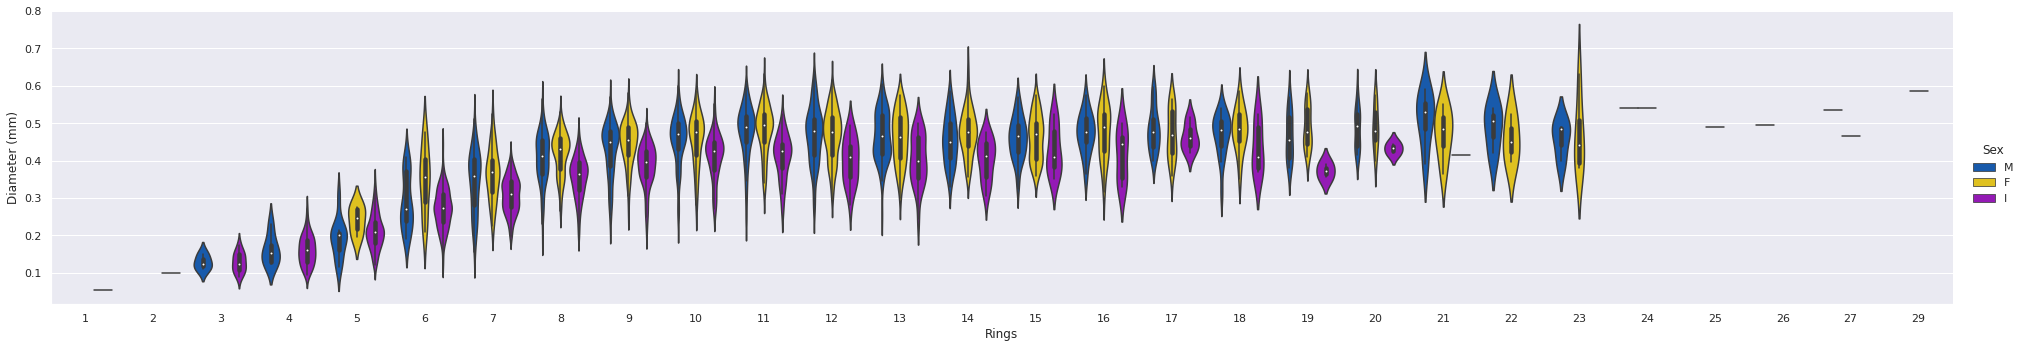

In [8]:
print("Violin plot showing the variation in distribution of diametre length as number of rings increase for males, females and infants")
sn.catplot(data=data, kind="violin", x="Rings", y="Diameter (mm)", hue="Sex", aspect = 5.5 
           , palette="prism")

Heatmap showing correlation between the various dimensions of the abalone


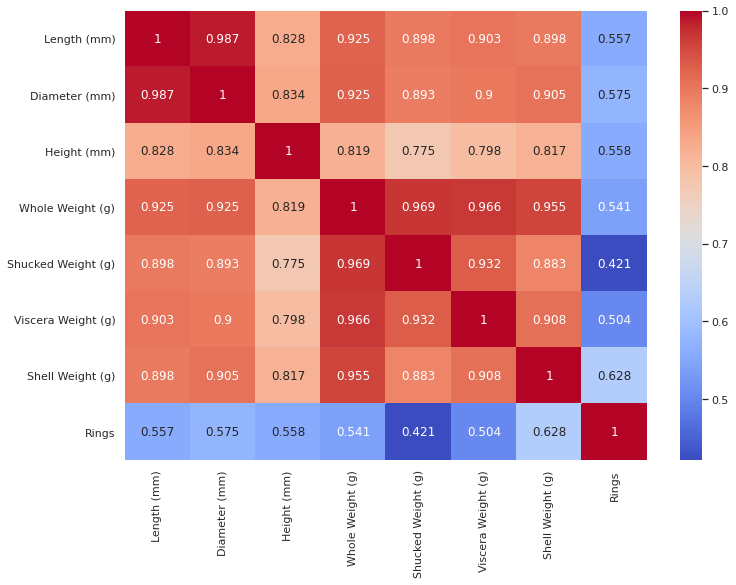

In [9]:
print("Heatmap showing correlation between the various dimensions of the abalone")
sn.heatmap(data.corr(), annot = True,fmt='.3g',cmap= 'coolwarm')

A visual representation of the relations found above, by plotting every variable against every variable, differentiating for males, females, and infants


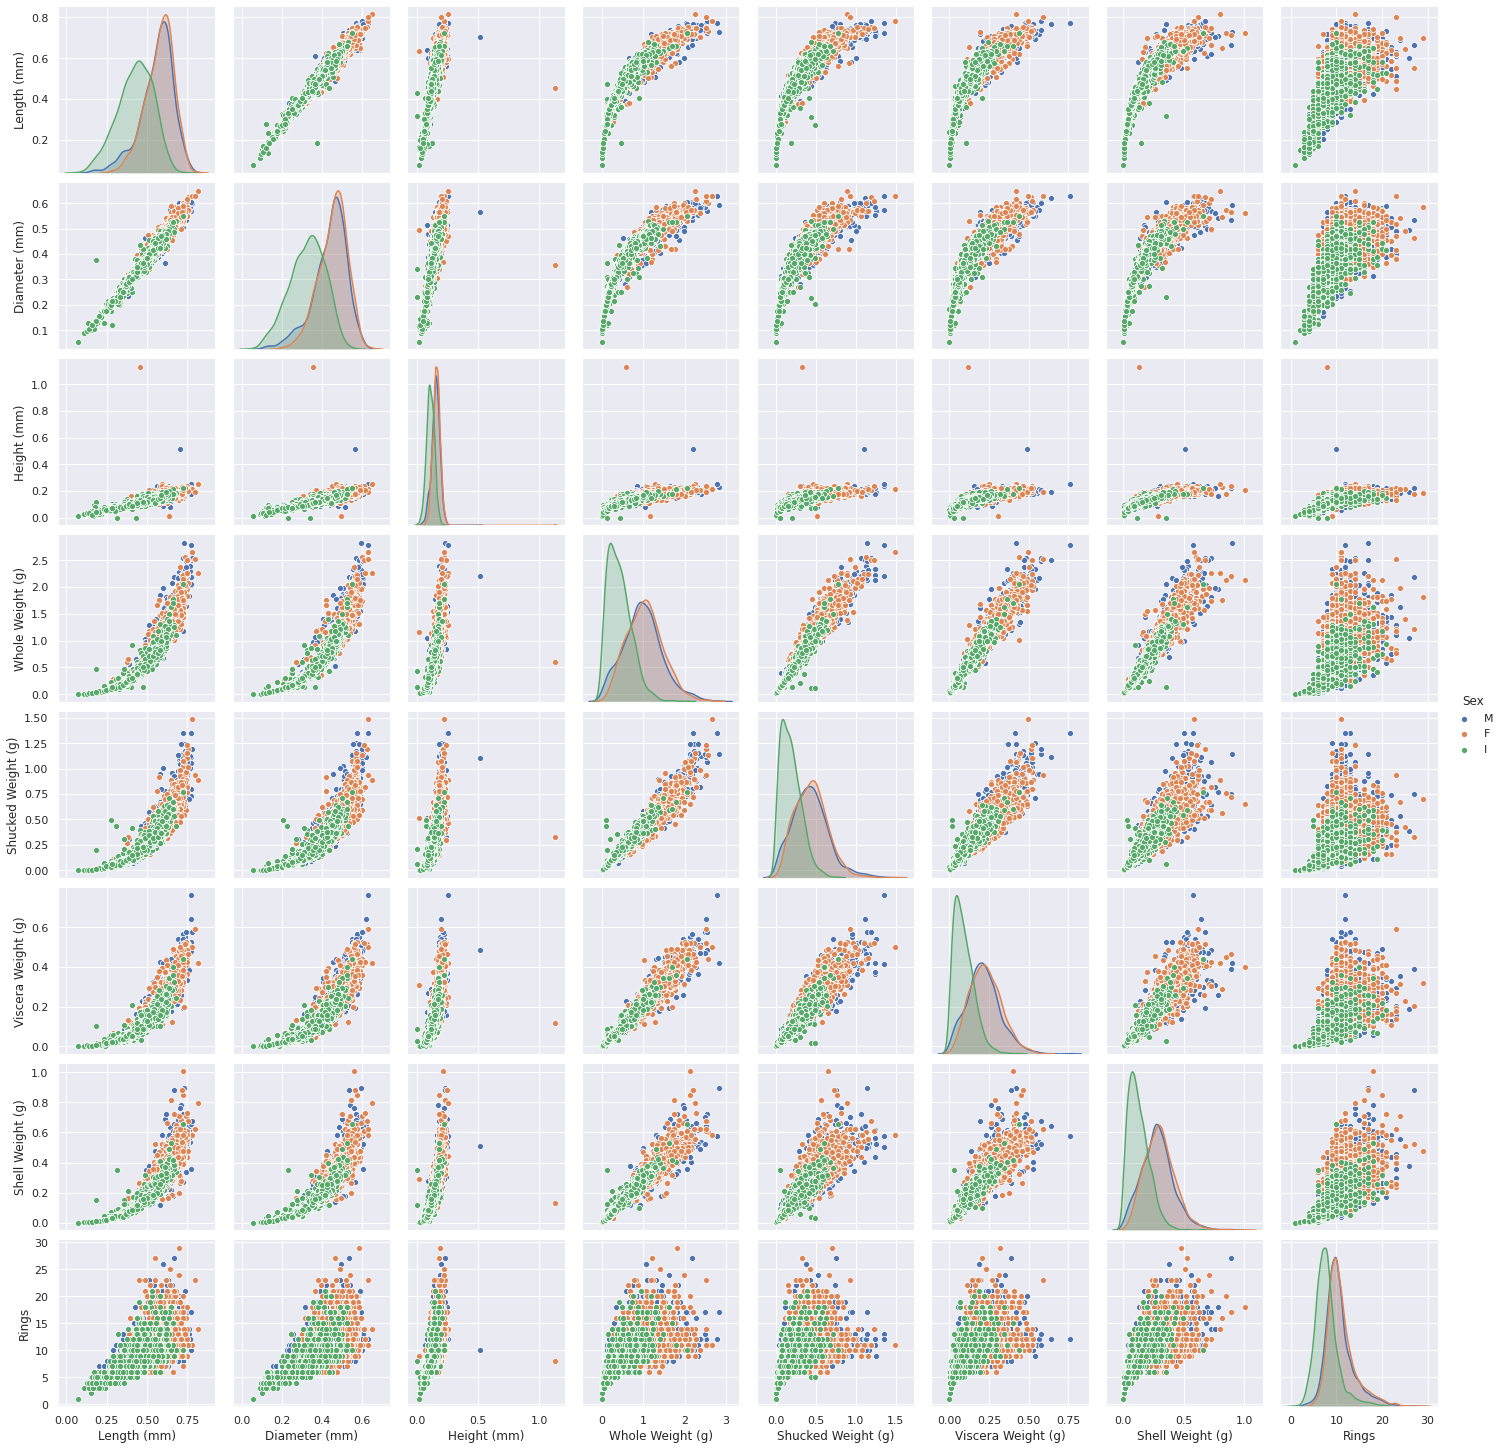

In [10]:
print("A visual representation of the relations found above, by plotting every variable against every variable, differentiating for males, females, and infants")
sn.pairplot(data, hue="Sex", height=2.5)

In [11]:
data.isnull().sum()

Sex                   0
Length (mm)           0
Diameter (mm)         0
Height (mm)           0
Whole Weight (g)      0
Shucked Weight (g)    0
Viscera Weight (g)    0
Shell Weight (g)      0
Rings                 0
dtype: int64

In [12]:
new_data = pd.get_dummies(data[['Sex','Length (mm)','Diameter (mm)','Height (mm)','Whole Weight (g)','Shucked Weight (g)','Viscera Weight (g)','Shell Weight (g)']], drop_first=True)
y = data['Rings']

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import f_regression
print(new_data.columns)
print("Finding F and p values for each variable in x")
f_regression(new_data, y)

Index(['Length (mm)', 'Diameter (mm)', 'Height (mm)', 'Whole Weight (g)',
       'Shucked Weight (g)', 'Viscera Weight (g)', 'Shell Weight (g)', 'Sex_I',
       'Sex_M'],
      dtype='object')
Finding F and p values for each variable in x


(array([1878.65759286, 2061.72537564, 1888.3248833 , 1725.51288849,
         900.502066  , 1423.36352441, 2718.59328775,  979.46448853,
         142.06560944]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 5.72761489e-316,
        2.53202256e-179, 2.75439992e-268, 0.00000000e+000, 2.47451255e-193,
        3.11997344e-032]))

We can see that the third last variable, shucked weight, is very significant, other weight is not, and height is intermediate and probably reponsibe for most of the differences between the two models. Let us take these data sets and run regressions:<br>
1)With all variables.<br>
2)With only one weight variable, since we see a high amount of correlation between them.<br>
3)With shucked weight and height.<br>
4)With shucked weight and an additional weight.

In [14]:
new_data_w = pd.get_dummies(data[['Sex','Length (mm)','Diameter (mm)','Height (mm)','Whole Weight (g)']], drop_first=True)
new_data_s = pd.get_dummies(data[['Sex','Length (mm)','Diameter (mm)','Shell Weight (g)']], drop_first=True)
new_data_sh = pd.get_dummies(data[['Sex','Length (mm)','Diameter (mm)','Height (mm)','Shell Weight (g)']], drop_first=True)
new_data_shw = pd.get_dummies(data[['Sex','Length (mm)','Diameter (mm)','Height (mm)','Whole Weight (g)','Shell Weight (g)']], drop_first=True)

In [15]:
def model(the_data,y,a=0.1):
    the_scaler = StandardScaler()
    the_scaler.fit(the_data)
    the_data_scaled = the_scaler.transform(the_data)
    x_tr, x_te, y_tr, y_te = train_test_split(the_data_scaled, y, test_size=a)
    regr = LinearRegression()
    regr.fit(x_tr,y_tr)
    y_h = regr.predict(x_tr)
    y_pr= regr.predict(x_te)
    print("Goodness of fit with only one weight variable:", regr.score(x_tr,y_tr))
    print("Train set RMSE:",np.sqrt(metrics.mean_squared_error(y_tr, y_h)))
    print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_te, y_pr)))
model(new_data,y)

Goodness of fit with only one weight variable: 0.537520310165076
Train set RMSE: 2.1952208294981026
Test set RMSE: 2.1474187185177525


So the one with all the weight variables has a better fit and explains variablity better

In [16]:
model(new_data_w,y)

Goodness of fit with only one weight variable: 0.36754884215633765
Train set RMSE: 2.5226268829340044
Test set RMSE: 2.8634807231467043


Thus we can see that the model with all weights predicts better. Checking the significance of the weights:

In [17]:
model(new_data_s,y)

Goodness of fit with only one weight variable: 0.41406521320598233
Train set RMSE: 2.4646286112830467
Test set RMSE: 2.5214859402746486


In [18]:
model(new_data_sh,y)

Goodness of fit with only one weight variable: 0.4134872464364643
Train set RMSE: 2.460410252676549
Test set RMSE: 2.4542357711285523


In [19]:
model(new_data_shw,y)

Goodness of fit with only one weight variable: 0.4664104825947487
Train set RMSE: 2.363755159756106
Test set RMSE: 2.115787345583475


In [22]:
#Without categorical variable sex
new_data_c=data[['Length (mm)','Diameter (mm)','Height (mm)','Shell Weight (g)']]
model(new_data_c,y)

Goodness of fit with only one weight variable: 0.4094403871521427
Train set RMSE: 2.4982572037286035
Test set RMSE: 2.320756986989146


Thus, more variables gives a better result, and replacing whole weight by shucked weight gives a significant advantage. Lets us eliminate an important variable, diametre.

In [23]:
new_data_d = pd.get_dummies(data[['Sex','Length (mm)','Height (mm)','Shell Weight (g)']], drop_first=True)
model(new_data_d,y)

Goodness of fit with only one weight variable: 0.41398196810630916
Train set RMSE: 2.4528426997122934
Test set RMSE: 2.732051585134054
